In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('gym_members_exercise_tracking.csv')
display(df.head())


Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [2]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['Duplicate'] = df.duplicated().sum()
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['avg'] = desc['mean'].values
    summ['std dev'] = desc['std'].values

    return summ

summary(df).style.background_gradient()

The dataset has no null or duplicated values, which is good.

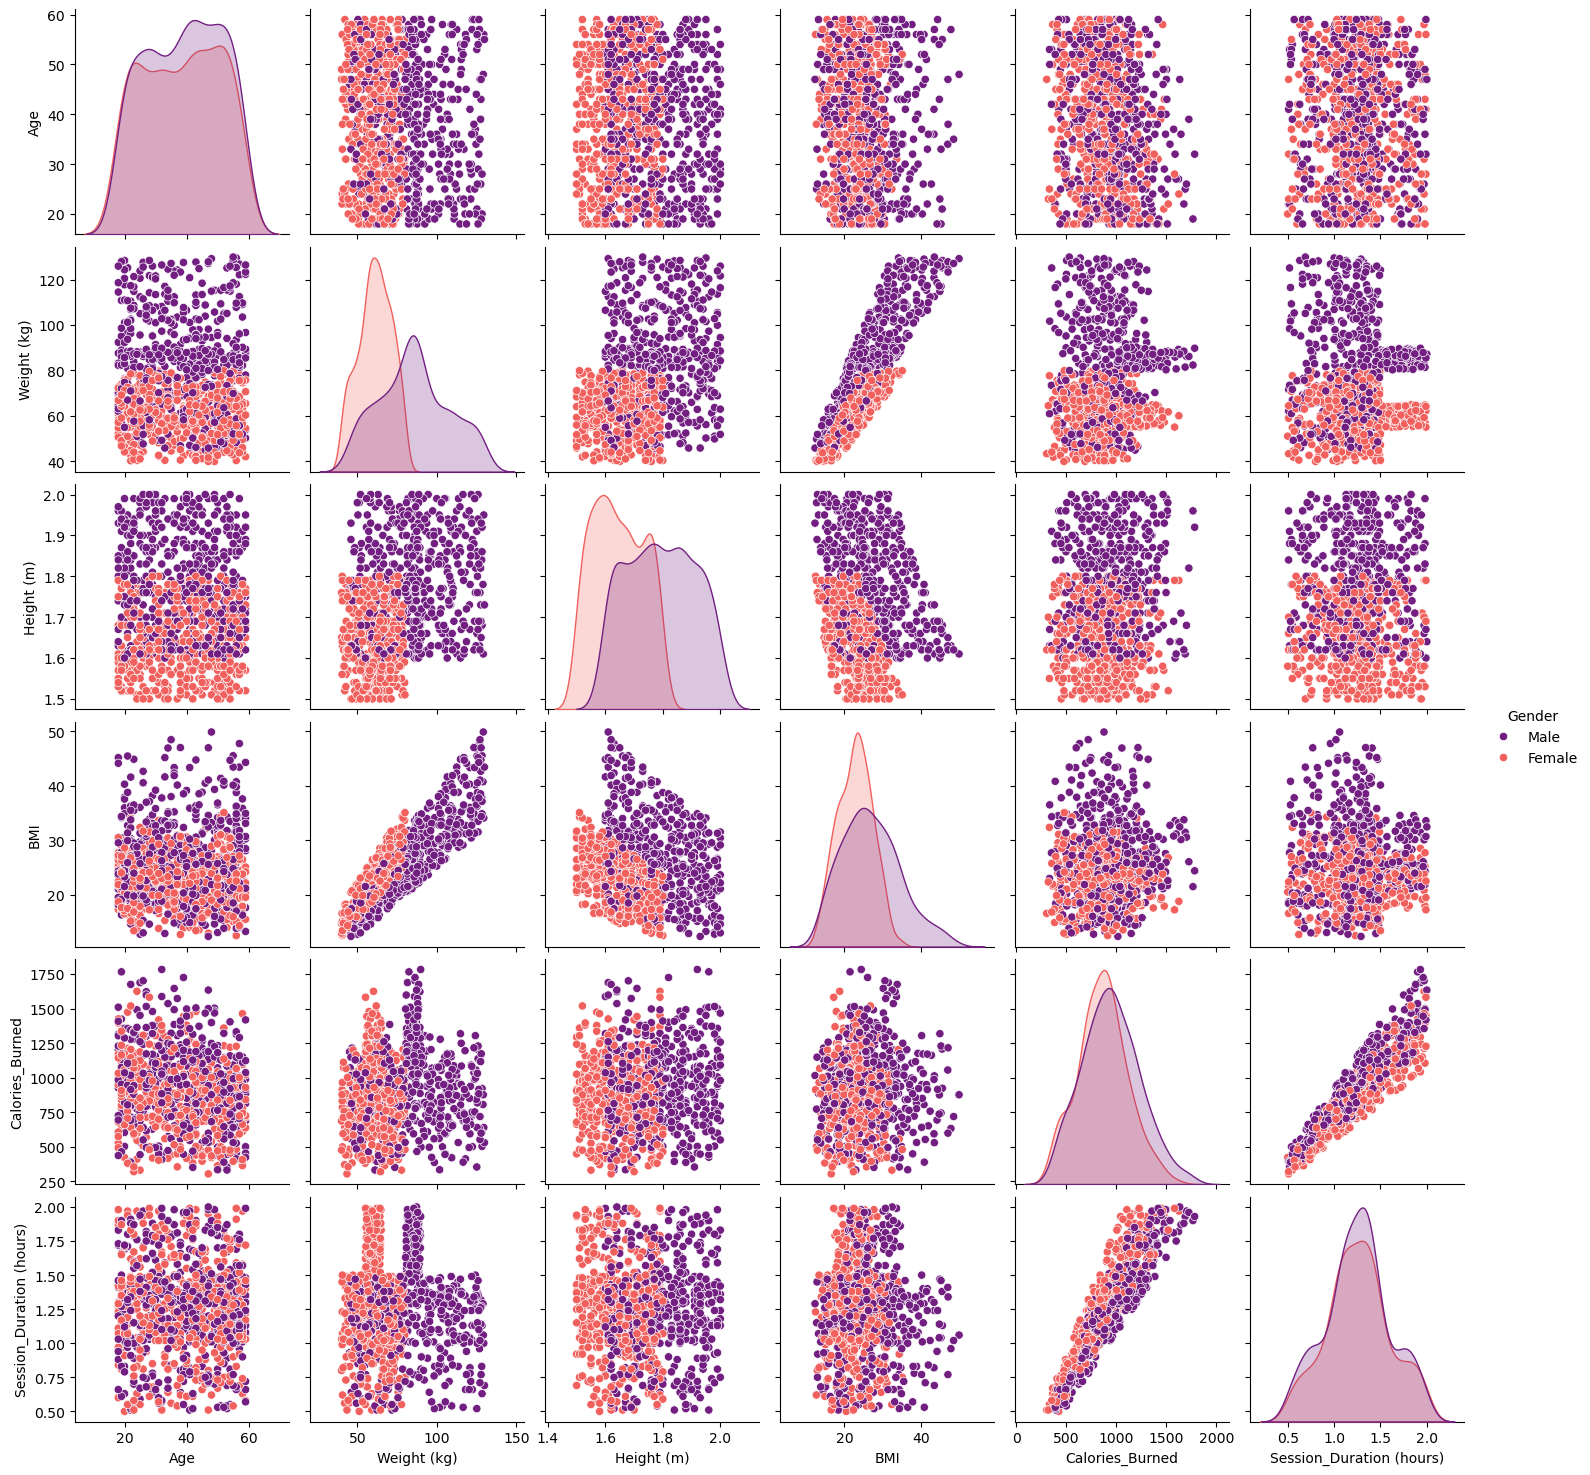

In [4]:
sns.pairplot(df[['Age','Weight (kg)', 'Height (m)', 'BMI', 'Calories_Burned', 'Session_Duration (hours)', 'Gender']], hue='Gender', palette='magma')
plt.show()

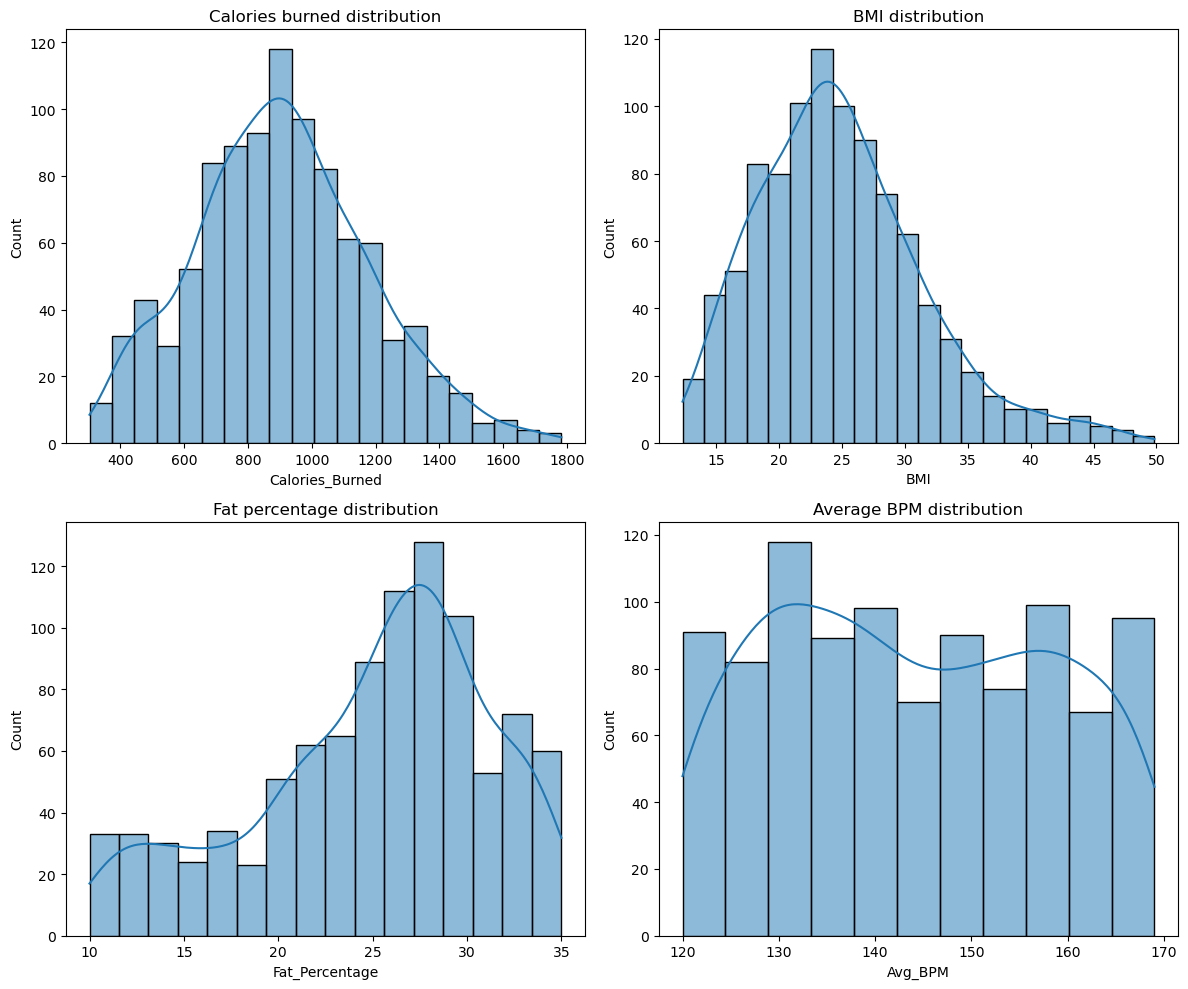

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df['Calories_Burned'], kde=True, ax=axes[0, 0]).set(title="Calories burned distribution")
sns.histplot(df['BMI'], kde=True, ax=axes[0, 1]).set(title="BMI distribution")
sns.histplot(df['Fat_Percentage'], kde=True, ax=axes[1, 0]).set(title="Fat percentage distribution")
sns.histplot(df['Avg_BPM'], kde=True, ax=axes[1, 1]).set(title="Average BPM distribution")

plt.tight_layout()
plt.show()

Made some basic histograms. These features seem to distribute nicely and are realistic.


Dataset after Encoding:


Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56       1         88.3        1.71      180      157           60   
1   46       0         74.9        1.53      179      151           66   
2   32       0         68.1        1.66      167      122           54   
3   25       1         53.2        1.70      190      164           56   
4   38       1         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                      1.69           1313.0             4            12.6   
1                      1.30            883.0             2            33.9   
2                      1.11            677.0             1            33.4   
3                      0.59            532.0             3            28.8   
4                      0.64            556.0             3            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

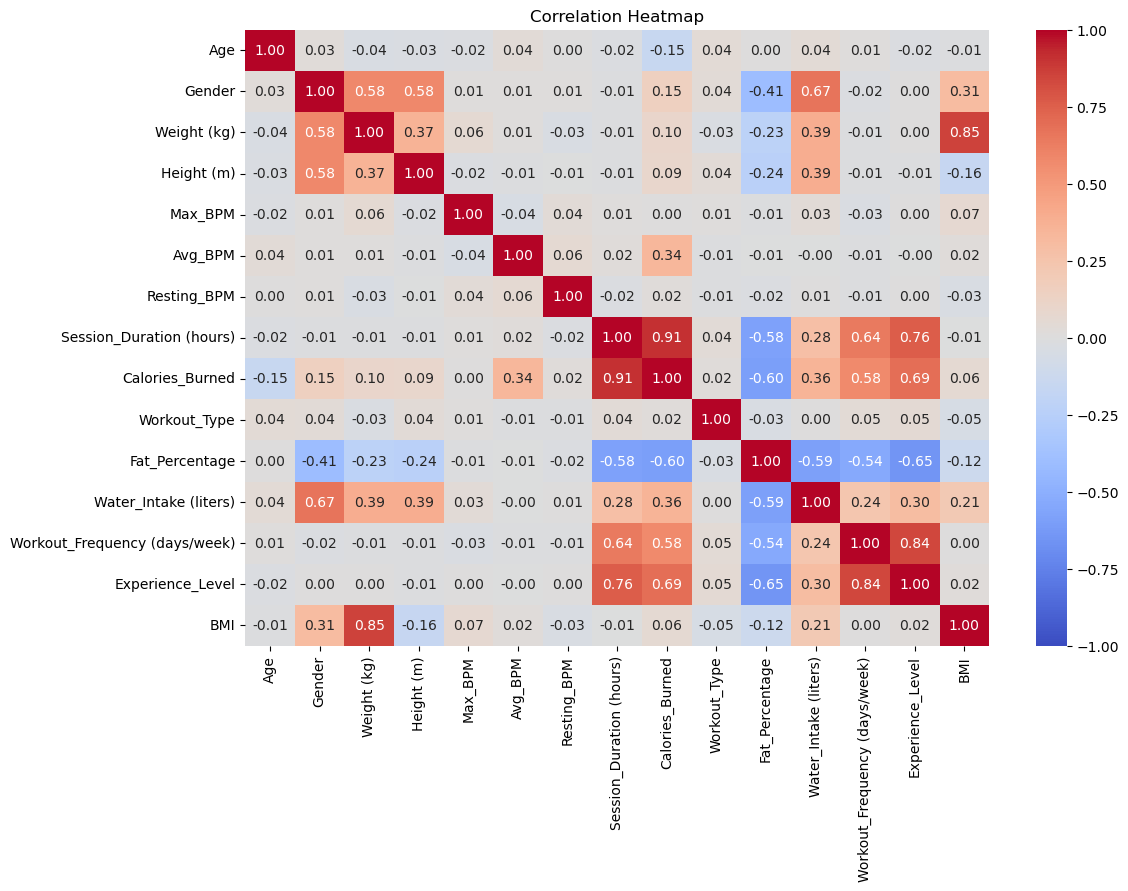

In [7]:
from sklearn.preprocessing import LabelEncoder

le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])

workout_type_mapping = {'Cardio': 1, 'HIIT': 2, 'Strength': 3, 'Yoga': 4}
df['Workout_Type'] = df['Workout_Type'].map(workout_type_mapping)

print("\nDataset after Encoding:")
display(df.head())

plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


Our goal is to predict the workout type and frequency based on demographic features. On first impression, there appears to be no correlations with any of the features when it comes to workout_type. The workout_frequency has some strong correlations with some of the features.

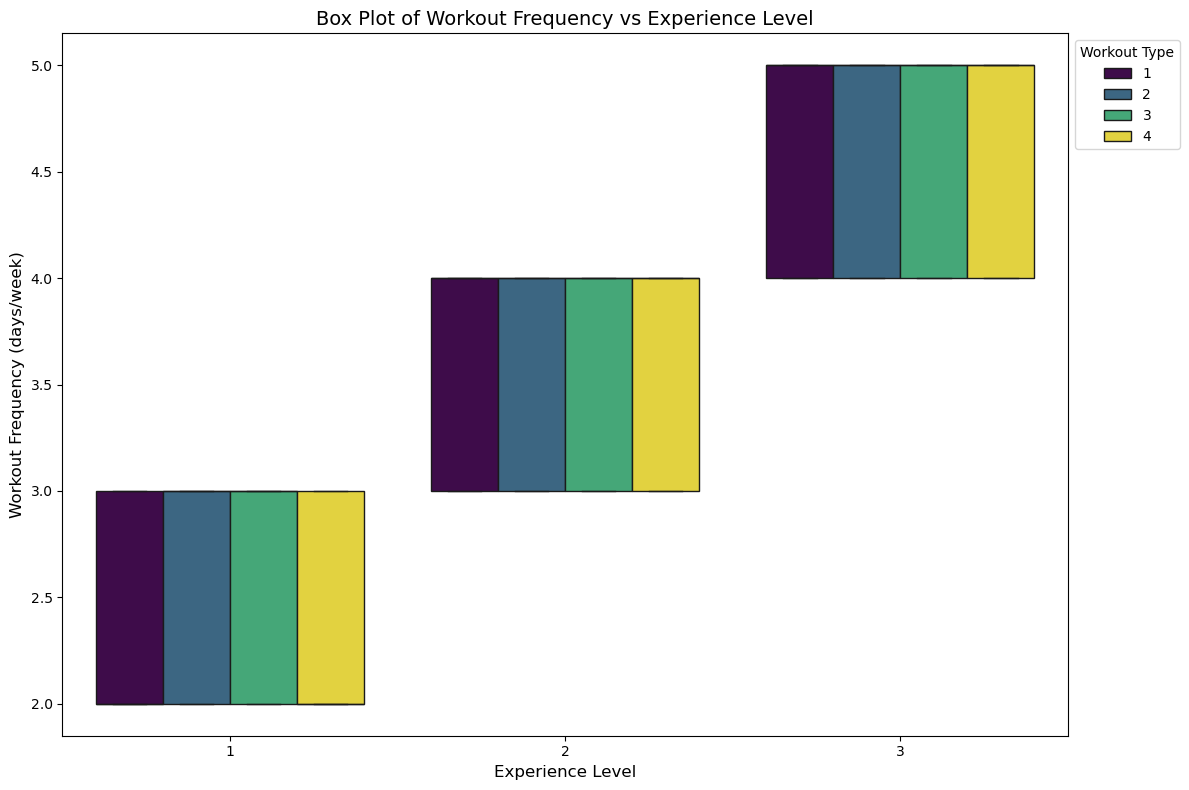

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(
    data=df, 
    x='Experience_Level', 
    y='Workout_Frequency (days/week)', 
    hue='Workout_Type', 
    palette='viridis'
)

plt.title('Box Plot of Workout Frequency vs Experience Level', fontsize=14)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Workout Frequency (days/week)', fontsize=12)

plt.legend(title='Workout Type', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


C:\Users\magnustr\AppData\Local\Temp\ipykernel_7904\1501791223.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


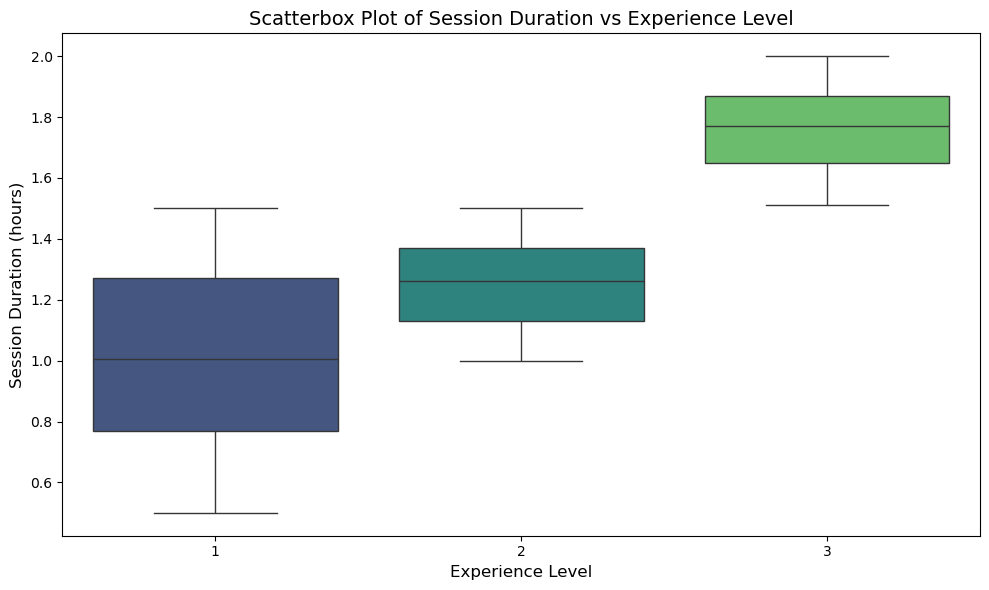

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df, 
    x='Experience_Level', 
    y='Session_Duration (hours)', 
    palette='viridis', 
    showfliers=True
)

plt.title('Scatterbox Plot of Session Duration vs Experience Level', fontsize=14)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Session Duration (hours)', fontsize=12)

plt.tight_layout()
plt.show()


Based on these plots, people with more experience have longer sessions. People with experience level 1 have higher variation in session duration than others. The data has also strictly defined experience level and workout frequency. There are no people with low experience who work out more than 3 days. This could be an issue later on.

C:\Users\magnustr\AppData\Local\Temp\ipykernel_7904\2345716351.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Workout_Type', y='Calories_Per_Hour', palette='Set2')


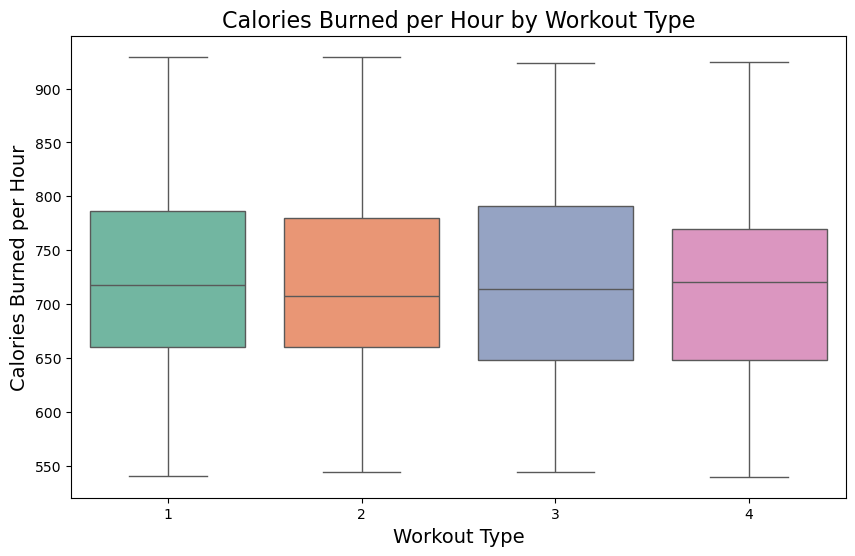

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Calories_Per_Hour'] = df['Calories_Burned'] / df['Session_Duration (hours)']
# Create a boxplot to visualize Calories per Hour by Workout Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workout_Type', y='Calories_Per_Hour', palette='Set2')

plt.title('Calories Burned per Hour by Workout Type', fontsize=16)
plt.xlabel('Workout Type', fontsize=14)
plt.ylabel('Calories Burned per Hour', fontsize=14)

plt.show()



Workout Effectiveness Analysis:
              Calories_Burned  Fat_Percentage     Max_BPM     Avg_BPM
Workout_Type                                                         
1                  884.513725       25.397647  179.874510  143.890196
2                  925.805430       24.461086  180.113122  143.524887
3                  910.697674       25.459302  179.027132  144.313953
4                  903.188285       24.483682  180.606695  143.267782


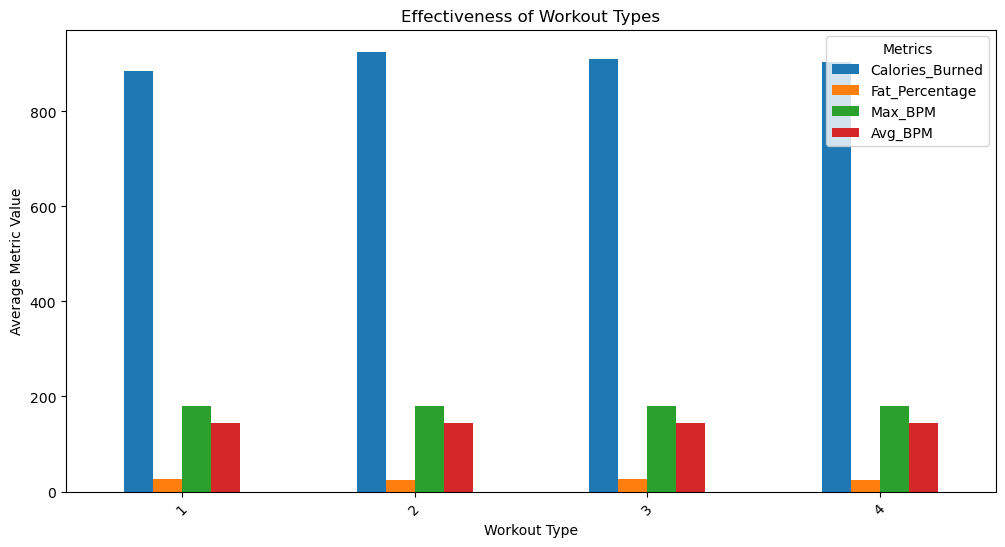

In [13]:
workout_analysis = df.groupby('Workout_Type')[['Calories_Burned', 'Fat_Percentage', 'Max_BPM', 'Avg_BPM']].mean()
print("\nWorkout Effectiveness Analysis:")
print(workout_analysis)

workout_analysis.plot(kind='bar', figsize=(12, 6))
plt.title('Effectiveness of Workout Types')
plt.xlabel('Workout Type')
plt.ylabel('Average Metric Value')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()


C:\Users\magnustr\AppData\Local\Temp\ipykernel_7904\1124620999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned', palette='Set2')


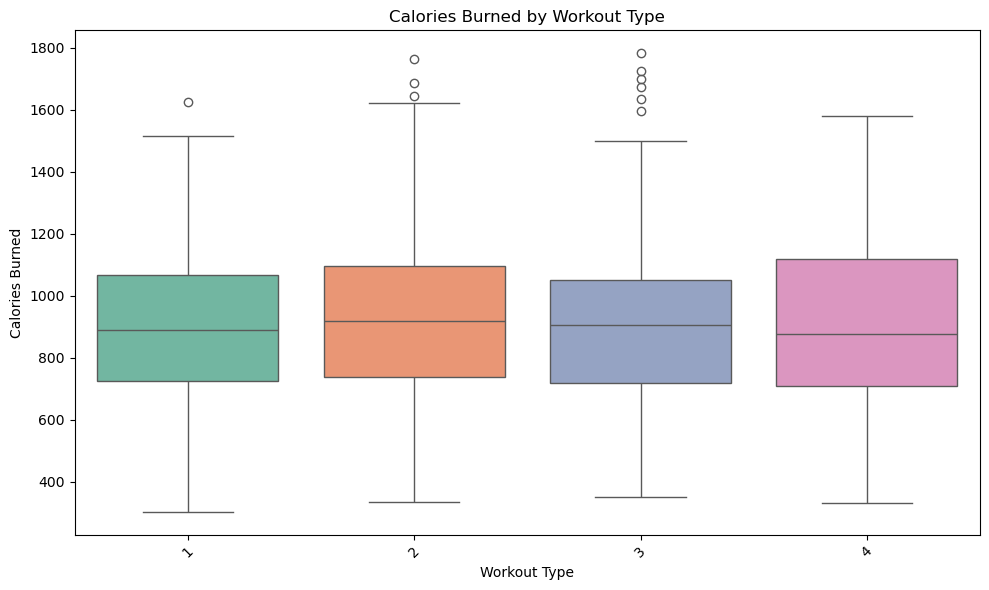

C:\Users\magnustr\AppData\Local\Temp\ipykernel_7904\1124620999.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Workout_Type', y='Fat_Percentage', palette='Set2')


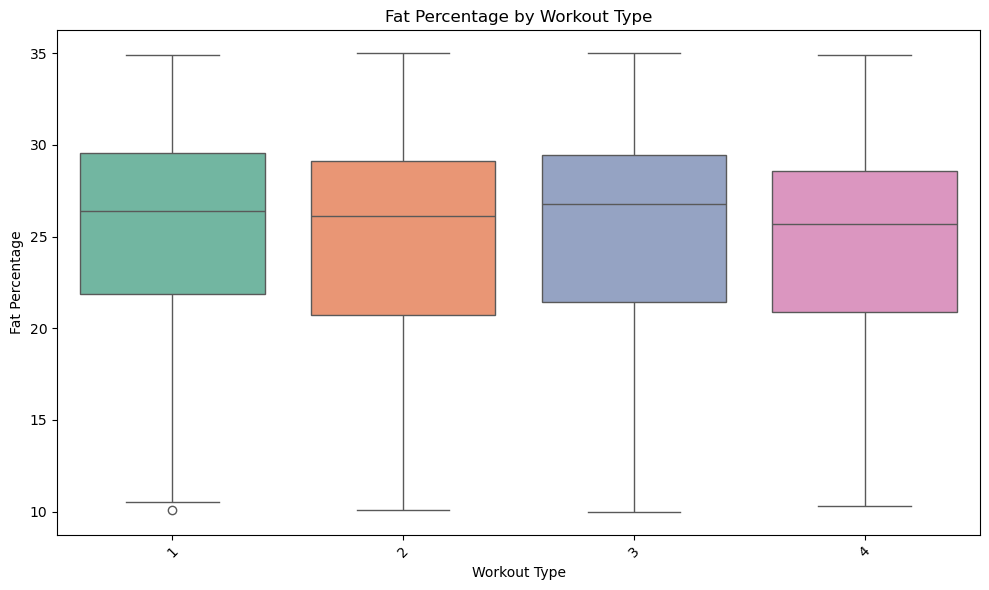

C:\Users\magnustr\AppData\Local\Temp\ipykernel_7904\1124620999.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Workout_Type', y='Session_Duration (hours)', palette='Set2')


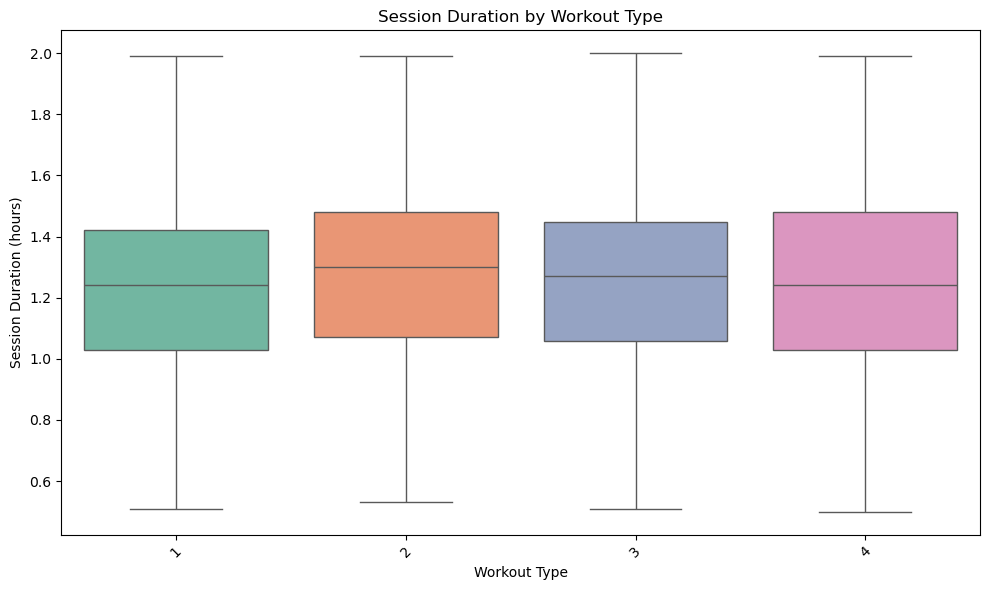

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned', palette='Set2')
plt.title('Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workout_Type', y='Fat_Percentage', palette='Set2')
plt.title('Fat Percentage by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Fat Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Workout_Type', y='Session_Duration (hours)', palette='Set2')
plt.title('Session Duration by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Session Duration (hours)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Based on these plots, the workout types have very similar metrics on all features, making it potentially difficult to make an accurate model.

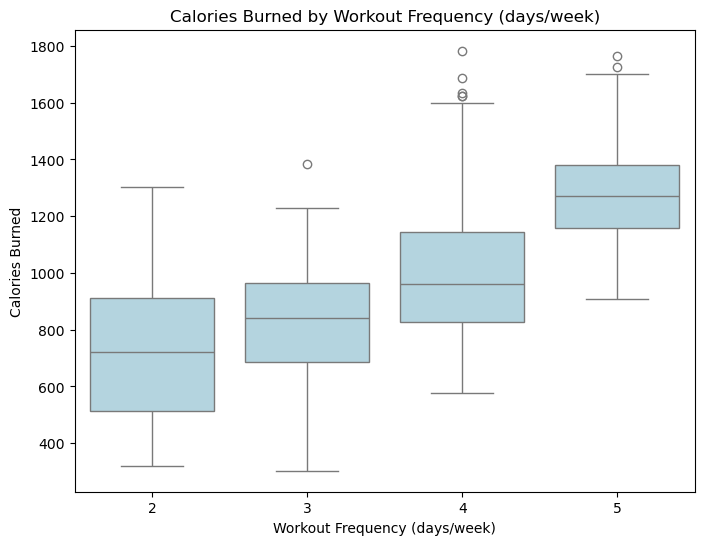

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Create a Box Plot with Median Line
plt.figure(figsize=(8, 6))
sns.boxplot(x='Workout_Frequency (days/week)', y='Calories_Burned', data=df, color='lightblue')

plt.title('Calories Burned by Workout Frequency (days/week)')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('Calories Burned')

plt.show()


There is a correlation between calories burned and workout frequency. People who work out more often also burn more calories per workout. This also means that experienced members have more intensive workouts, since we previously saw that the frequency was very strictly distributed between the experience levels.

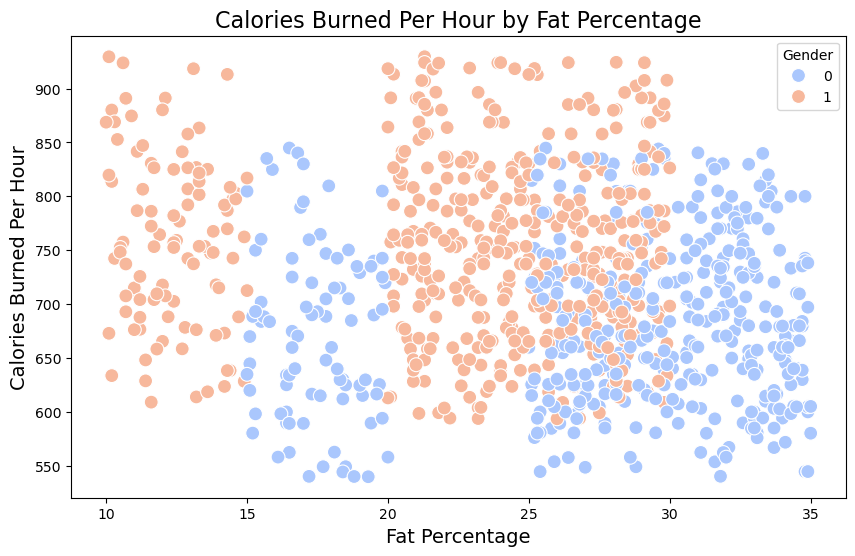

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Fat_Percentage', y='Calories_Per_Hour', hue='Gender', palette='coolwarm', s=100)

plt.title('Calories Burned Per Hour by Fat Percentage', fontsize=16)
plt.xlabel('Fat Percentage', fontsize=14)
plt.ylabel('Calories Burned Per Hour', fontsize=14)

plt.show()


Fat percentage seems to have no correlation with calories burned. The gender is weirdly distributed in this plot, which could mean the data wasn't generated very accurately.

<Figure size 1200x600 with 0 Axes>

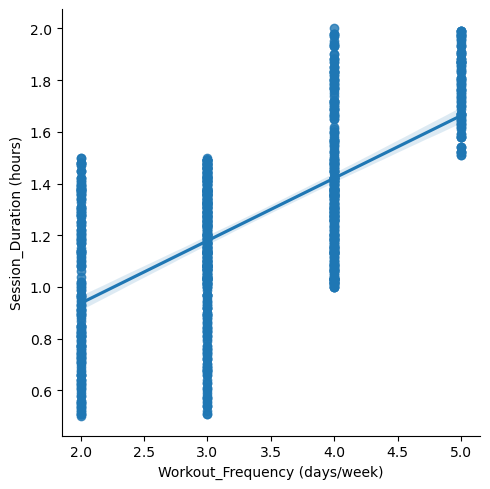

In [20]:
plt.figure(figsize=(12,6))

sns.lmplot(x='Workout_Frequency (days/week)',y='Session_Duration (hours)',data=df)

plt.show()

This plot indicates that experienced members have longer sessions, which also confirms our previous assumption of them having more intensive sessions.

C:\Users\magnustr\AppData\Local\Temp\ipykernel_7904\3821407422.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_level['BMI_Category'] = df_level['BMI'].apply(classify_bmi)


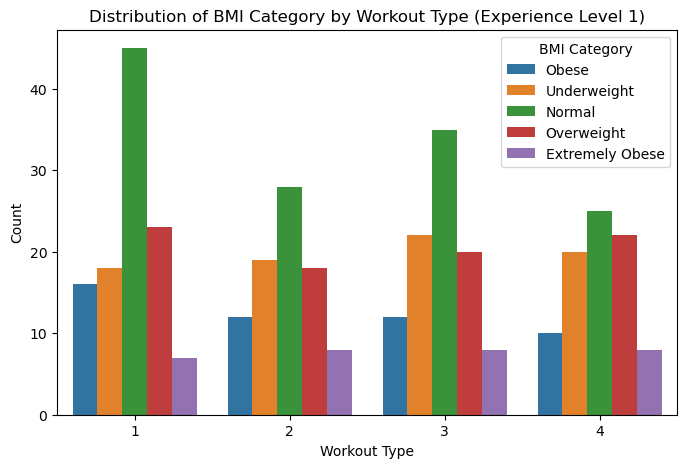

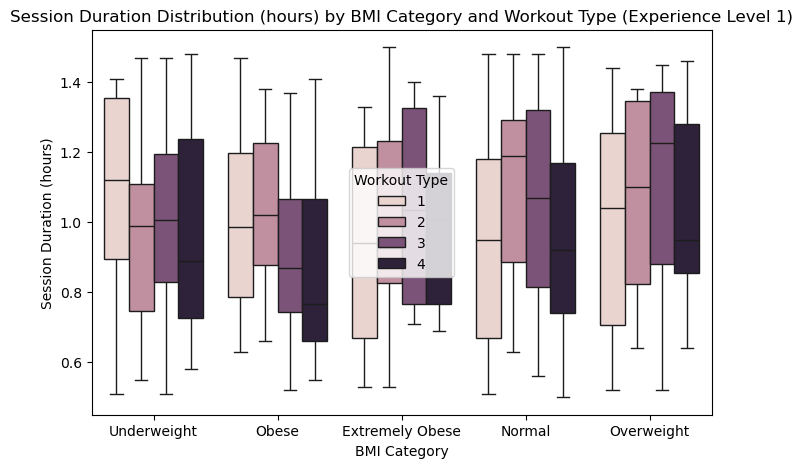

C:\Users\magnustr\AppData\Local\Temp\ipykernel_7904\3821407422.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_level['BMI_Category'] = df_level['BMI'].apply(classify_bmi)


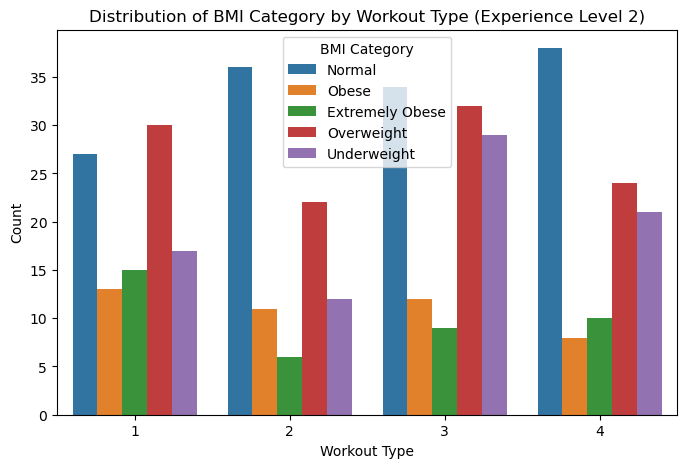

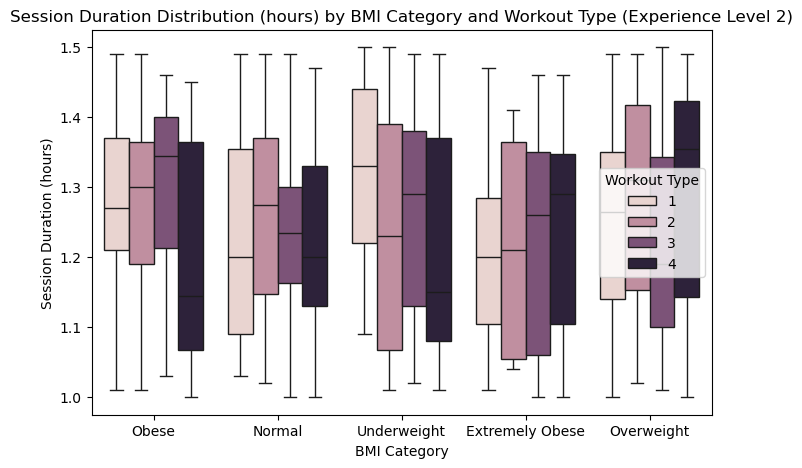

C:\Users\magnustr\AppData\Local\Temp\ipykernel_7904\3821407422.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_level['BMI_Category'] = df_level['BMI'].apply(classify_bmi)


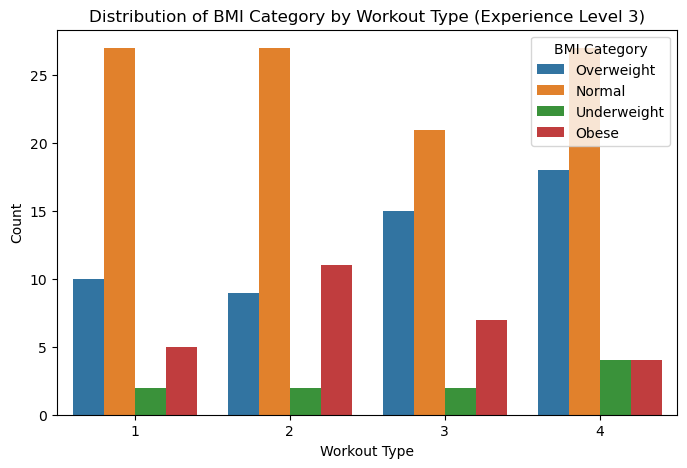

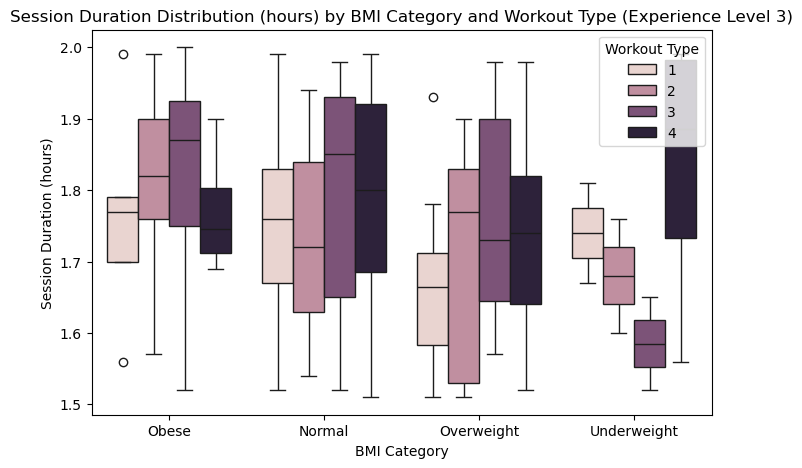

In [22]:
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obese'
    else:
        return 'Extremely Obese'

for level in [1, 2, 3]:
    df_level = df[df['Experience_Level'] == level]
    
    df_level['BMI_Category'] = df_level['BMI'].apply(classify_bmi)
    
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Workout_Type', hue='BMI_Category', data=df_level)
    plt.title(f'Distribution of BMI Category by Workout Type (Experience Level {level})')
    plt.xlabel('Workout Type')
    plt.ylabel('Count')
    plt.legend(title='BMI Category')
    plt.show()
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='BMI_Category', y='Session_Duration (hours)', hue='Workout_Type', data=df_level)
    plt.title(f'Session Duration Distribution (hours) by BMI Category and Workout Type (Experience Level {level})')
    plt.xlabel('BMI Category')
    plt.ylabel('Session Duration (hours)')
    plt.legend(title='Workout Type')
    plt.show()


Individuals with experience level 1 are more likely to engage in cardio exercises and tend to have longer cardio sessions compared to other workout types. As experience increases, there is a noticeable shift, with slightly more experienced individuals favoring strength training. The most experienced individuals show a lower prevalence of obesity and underweight cases, with no instances of extreme obesity. As previously observed, this could be attributed to their participation in more intensive workout sessions, which may contribute to better overall health and fitness outcomes.

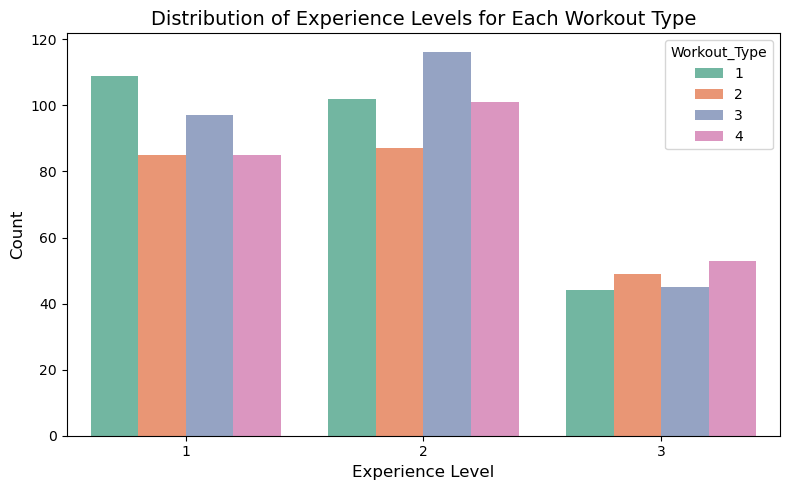

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Experience_Level', hue='Workout_Type', palette='Set2')

plt.title('Distribution of Experience Levels for Each Workout Type', fontsize=14)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


While the correlation is not very strong, the data suggests that individuals with less experience tend to engage more in cardio workouts compared to other types. As individuals gain more experience, they increasingly shift towards strength-based training.

C:\Users\magnustr\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\magnustr\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\magnustr\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\magnustr\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

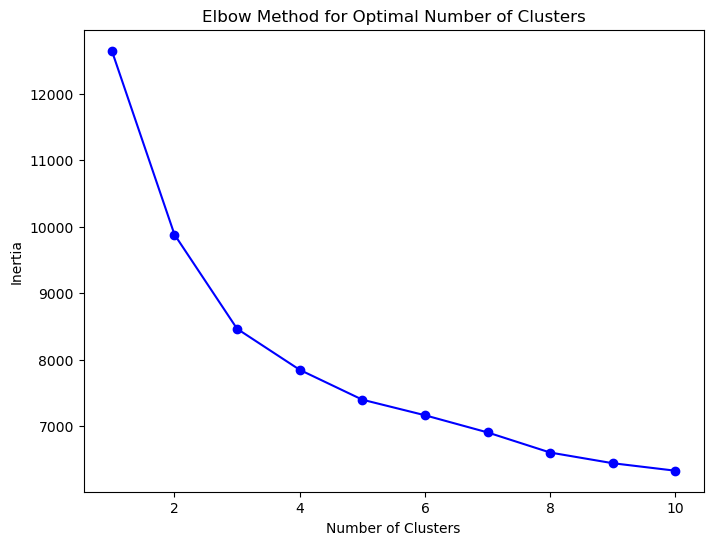

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

X = df[['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 
        'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 
        'Experience_Level', 'BMI']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

To examine the relationships between various features in the dataset, we utilized KMeans clustering to group individuals with similar characteristics. Our analysis indicated that the optimal number of clusters is 3, providing a meaningful segmentation of the data.

C:\Users\magnustr\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


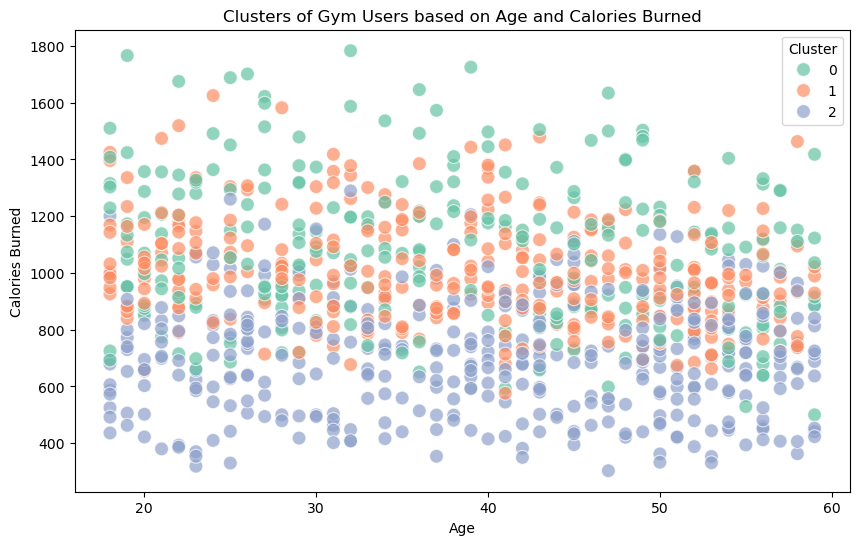

Cluster Centers:
         Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
0 -0.088802     1.144669    0.585615  0.099235  0.034045    -0.007256   
1 -0.017243    -0.572279   -0.398225 -0.092681  0.097968    -0.115957   
2  0.072608    -0.286940   -0.060672  0.010302 -0.102456     0.099495   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                  0.531603         0.683254       -0.812713   
1                  0.492817         0.365466       -0.011525   
2                 -0.752874        -0.748798        0.545018   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0               0.977737                       0.442903          0.528742   
1              -0.351817                       0.613575          0.619557   
2              -0.356999                      -0.793052         -0.854509   

        BMI  
0  0.882762  
1 -0.384944  
2 -0.267349  

Cluster Distribution:
Cluster
2    393
1    321
0    259
Name: cou

In [113]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Age'], y=df['Calories_Burned'], hue=df['Cluster'], palette='Set2', s=100, alpha=0.7)
plt.title('Clusters of Gym Users based on Age and Calories Burned')
plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.show()

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("Cluster Centers:\n", cluster_centers)

print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

C:\Users\magnustr\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


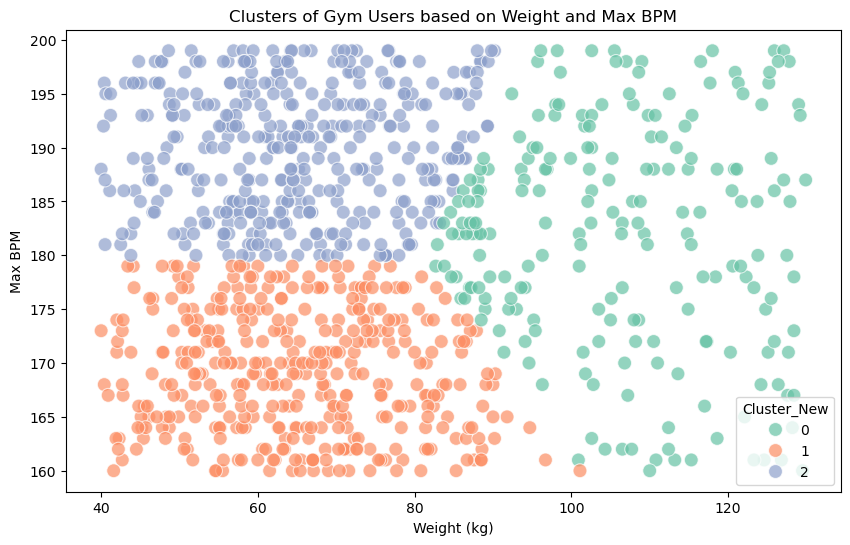

Cluster Centers (Weight and Max BPM):
    Weight (kg)   Max_BPM
0    -0.416110  0.854793
1    -0.410248 -0.934230
2     1.519526  0.176184

Cluster Distribution (Weight and Max BPM):
Cluster_New
1    385
2    378
0    210
Name: count, dtype: int64


In [120]:
X_new = df[['Weight (kg)', 'Max_BPM']]

df['Cluster_New'] = kmeans.fit_predict(X_scaled_new)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Weight (kg)'], y=df['Max_BPM'], hue=df['Cluster_New'], palette='Set2', s=100, alpha=0.7)
plt.title('Clusters of Gym Users based on Weight and Max BPM')
plt.xlabel('Weight (kg)')
plt.ylabel('Max BPM')
plt.show()

cluster_centers_new = pd.DataFrame(kmeans_new.cluster_centers_, columns=X_new.columns)
print("Cluster Centers (Weight and Max BPM):\n", cluster_centers_new)

print("\nCluster Distribution (Weight and Max BPM):")
print(df['Cluster_New'].value_counts())


C:\Users\magnustr\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


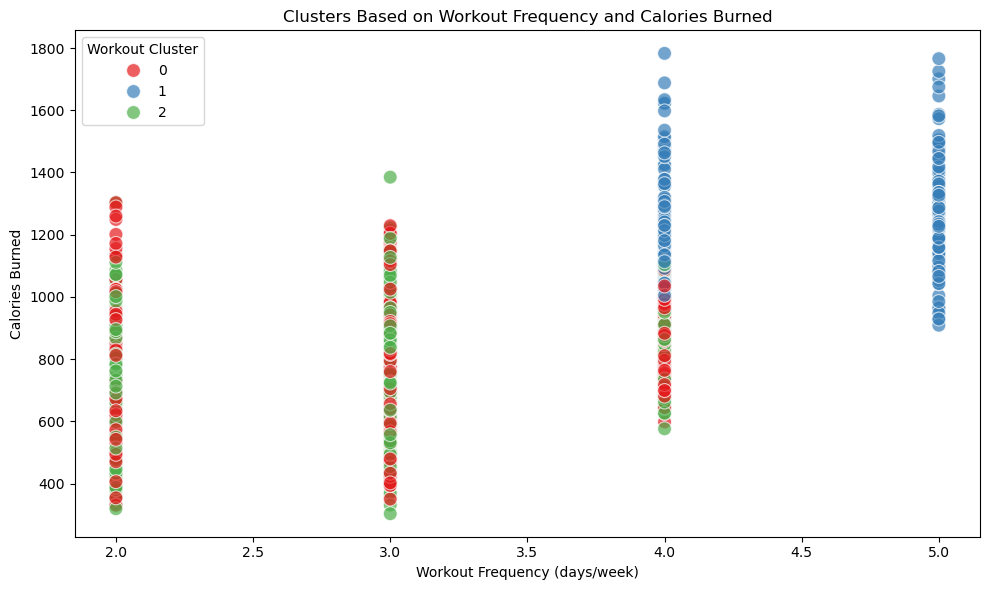

Workout Cluster Centers:
    Workout_Type  Workout_Frequency  Calories_Burned  Experience_Level
0      0.874473          -0.315692        -0.359247         -0.378934
1      0.013181           1.256008         1.271602          1.442259
2     -0.927431          -0.412056        -0.375491         -0.455883

Cluster Distribution:
Workout_Cluster
0    387
2    368
1    218
Name: count, dtype: int64


In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

X_workout = df[['Workout_Type', 'Workout_Frequency (days/week)', 'Calories_Burned', 'Experience_Level']]

df['Workout_Cluster'] = kmeans.fit_predict(X_scaled_workout)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Workout_Frequency (days/week)'],
    y=df['Calories_Burned'],
    hue=df['Workout_Cluster'],
    palette='Set1',
    s=100,
    alpha=0.7
)
plt.title('Clusters Based on Workout Frequency and Calories Burned')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('Calories Burned')
plt.legend(title='Workout Cluster', loc='upper left')
plt.tight_layout()
plt.show()

workout_centers = pd.DataFrame(
    kmeans.cluster_centers_, 
    columns=['Workout_Type', 'Workout_Frequency', 'Calories_Burned', 'Experience_Level']
)
print("Workout Cluster Centers:\n", workout_centers)

print("\nCluster Distribution:")
print(df['Workout_Cluster'].value_counts())


Although the clusters are somewhat distinguishable, they do not provide actionable insights or meaningful guidance for decision-making. The lack of clear separation and overlap between the clusters suggests that the features used might not strongly influence workout behavior or outcomes.

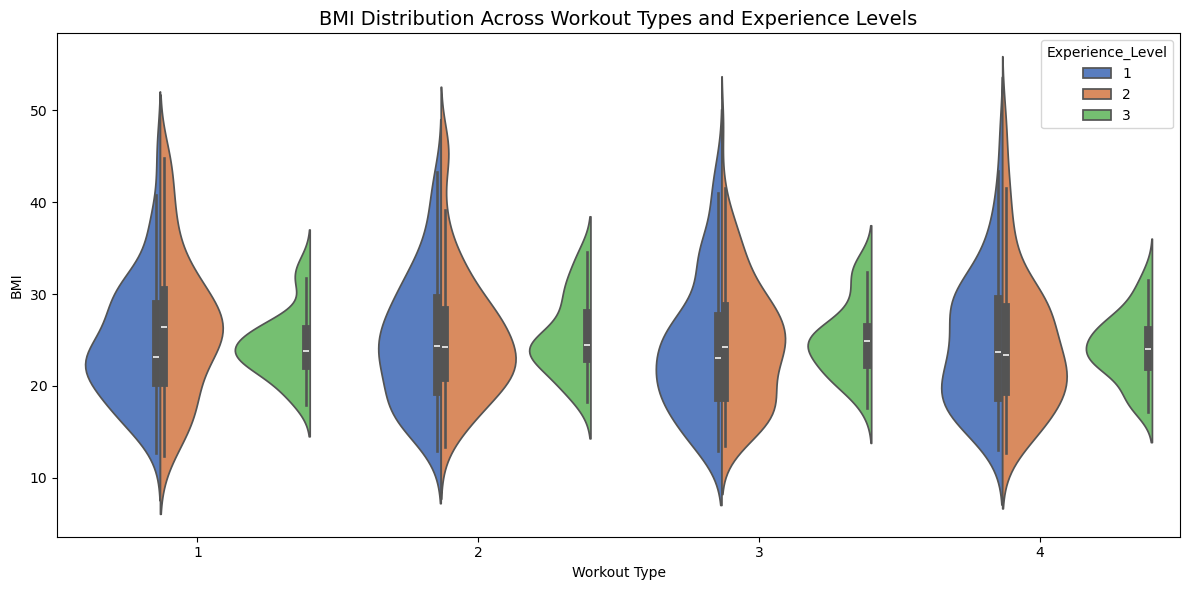

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.violinplot(x='Workout_Type', y='BMI', data=df, hue='Experience_Level', split=True, palette='muted')
plt.title('BMI Distribution Across Workout Types and Experience Levels', fontsize=14)
plt.xlabel('Workout Type')
plt.ylabel('BMI')
plt.tight_layout()
plt.show()


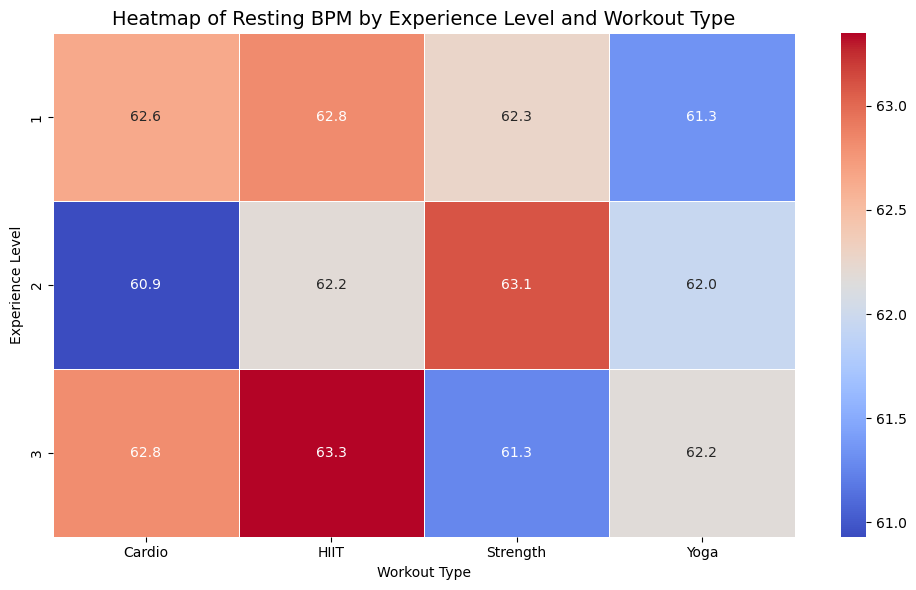

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

workout_type_mapping = {1: 'Cardio', 2: 'HIIT', 3: 'Strength', 4: 'Yoga'}

heatmap_data = df.pivot_table(values='Resting_BPM', index='Experience_Level', columns='Workout_Type', aggfunc='mean')

heatmap_data.columns = heatmap_data.columns.map(workout_type_mapping)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Heatmap of Resting BPM by Experience Level and Workout Type', fontsize=14)
plt.xlabel('Workout Type')
plt.ylabel('Experience Level')
plt.tight_layout()
plt.savefig('results3.pdf')
plt.show()


The two plots reveal that the data appears to be randomly generated, particularly in terms of the relationship between workout types and their effects, rather than being based on real-life studies. Ideally, we would expect experienced members to have lower resting heart rates, and distinct workout types should show variations in their impacts. However, the dataset analyzed indicates no meaningful differences between the workout types, suggesting a lack of correlation or structure in the data. This highlights a potential limitation in the dataset, as it does not reflect real-world patterns or expectations based on fitness science.

In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error

X = df.drop(columns=['Workout_Type', 'Workout_Frequency (days/week)']) 
y_type = df['Workout_Type']
y_freq = df['Workout_Frequency (days/week)']

X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(X, y_type, test_size=0.2, random_state=42)

# Defining hyperparameters for RandomForestClassifier
rf_params = {
    'n_estimators': [200, 300],
    'max_depth': [None, 20, 30],
    'min_samples_split': [5, 7],
    'min_samples_leaf': [2, 3],
    'bootstrap': [True, False]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy')
rf_grid.fit(X_train_type, y_train_type)

# Printing the best parameters and accuracy for Workout Type prediction
print(f"Best Params for Random Forest: {rf_grid.best_params_}")
print(f"Best Accuracy for Workout Type: {rf_grid.best_score_}")

y_pred_type = rf_grid.best_estimator_.predict(X_test_type)

accuracy = accuracy_score(y_test_type, y_pred_type)
print(f"Workout Type Prediction Accuracy on Test Set: {accuracy}")

X_train_freq, X_test_freq, y_train_freq, y_test_freq = train_test_split(X, y_freq, test_size=0.2, random_state=42)

# Initializing GradientBoostingRegressor for Workout Frequency
gb_params = {
    'n_estimators': [100, 300],
    'learning_rate': [0.0001, 0.1],
    'max_depth': [3, 5]
}

gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_params, cv=3)
gb_grid.fit(X_train_freq, y_train_freq)

print(f"Best Params for Gradient Boosting: {gb_grid.best_params_}")
print(f"Best RMSE on Training Set: {gb_grid.best_score_}")

y_pred_freq = gb_grid.best_estimator_.predict(X_test_freq)

rmse = mean_squared_error(y_test_freq, y_pred_freq, squared=False)
print(f"Workout Frequency Prediction RMSE on Test Set: {rmse}")


Best Params for Random Forest: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 300}
Best Accuracy for Workout Type: 0.2930551430551431
Workout Type Prediction Accuracy on Test Set: 0.2564102564102564
Best Params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best RMSE on Training Set: 0.6448320318206738
Workout Frequency Prediction RMSE on Test Set: 0.5245841285458752


C:\Users\magnustr\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The model has very poor accuracy both on frequency and workout type. This lines up with our assumption, as we previously saw that there were no strong correlations with workout type making the prediction for workout type pointless. Let's try to improve workout frequency prediction.

In [26]:
model_freq = gb_grid.best_estimator_

importances = model_freq.feature_importances_

print("Feature Importances:", importances)

import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances Sorted:")
print(feature_importance_df)


Feature Importances: [0.01675432 0.         0.02034247 0.00859128 0.01856575 0.00875534
 0.00557132 0.01504994 0.01687403 0.21454902 0.00738575 0.63313847
 0.0166106  0.0178117 ]

Feature Importances Sorted:
                     Feature  Importance
11          Experience_Level    0.633138
9             Fat_Percentage    0.214549
2                Weight (kg)    0.020342
4                    Max_BPM    0.018566
13         Calories_Per_Hour    0.017812
8            Calories_Burned    0.016874
0                        Age    0.016754
12                       BMI    0.016611
7   Session_Duration (hours)    0.015050
5                    Avg_BPM    0.008755
3                 Height (m)    0.008591
10     Water_Intake (liters)    0.007386
6                Resting_BPM    0.005571
1                     Gender    0.000000


In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['Experience_Level', 'Fat_Percentage', 'Max_BPM', 'Session_Duration (hours)', 'Age']]
y_freq = df['Workout_Frequency (days/week)']

X_train_freq, X_test_freq, y_train_freq, y_test_freq = train_test_split(X, y_freq, test_size=0.2, random_state=42)

gb = GradientBoostingRegressor(
    n_estimators=300, 
    learning_rate=0.00001, 
    max_depth=4, 
    random_state=42
)

gb.fit(X_train_freq, y_train_freq)

y_pred_freq = gb.predict(X_test_freq)

rmse = mean_squared_error(y_test_freq, y_pred_freq, squared=False)
print(f"Workout Frequency Prediction RMSE on Test Set: {rmse}")


Workout Frequency Prediction RMSE on Test Set: 0.9631619132016072


C:\Users\magnustr\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The model is good for predicting workout frequency with accuracy 96% as it is strongly correlated to the experience level. Since we previously saw that calories burned had strong correlations as well, we will try to replace it with workout type in our model.

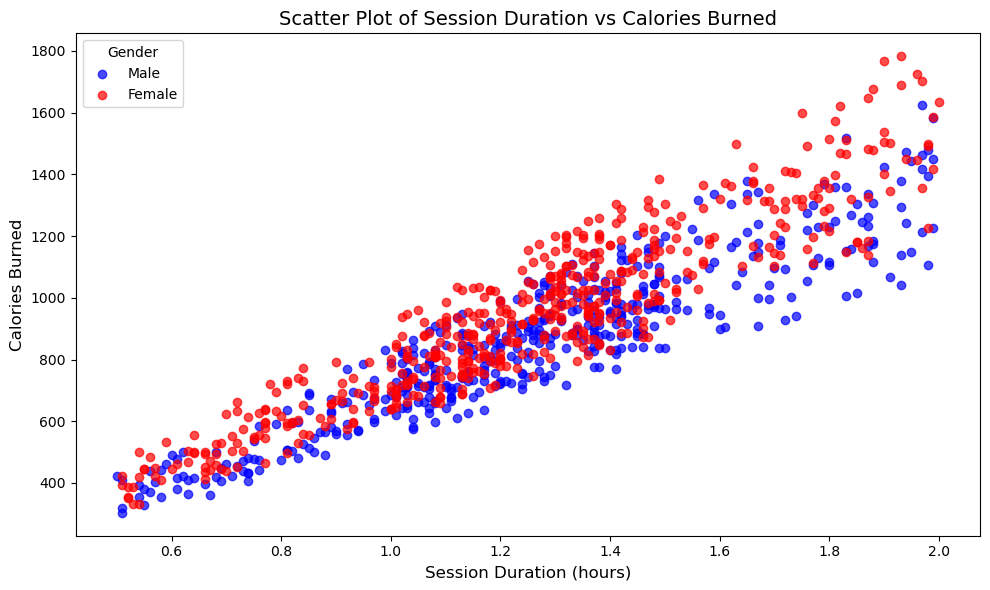

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(df[df['Gender'] == 0]['Session_Duration (hours)'], df[df['Gender'] == 0]['Calories_Burned'], color='blue', label='Male', alpha=0.7)
plt.scatter(df[df['Gender'] == 1]['Session_Duration (hours)'], df[df['Gender'] == 1]['Calories_Burned'], color='red', label='Female', alpha=0.7)

plt.title('Scatter Plot of Session Duration vs Calories Burned', fontsize=14)
plt.xlabel('Session Duration (hours)', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)

plt.legend(title='Gender')
plt.savefig('results2.pdf')

plt.tight_layout()
plt.show()


The correlation is strongly linear.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['Gender', 'Avg_BPM', 'Age', 'Session_Duration (hours)', 'Experience_Level']]
y = df['Calories_Burned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(lr.score(X_train, y_train))
print(f"Intercept (Bias): {lr.intercept_}")

print("\nCoefficients:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"{feature}: {coef}")


0.9782204799433603
Intercept (Bias): -803.3986310596372

Coefficients:
Gender: 88.28378339070616
Avg_BPM: 6.17510103558709
Age: -3.3259504524923846
Session_Duration (hours): 715.1315081390832
Experience_Level: 2.4911388839679147


According to our heatmap, we tried different features that had correlation with the Calories_burned and trained our model to score of 0.97 which is quite good.

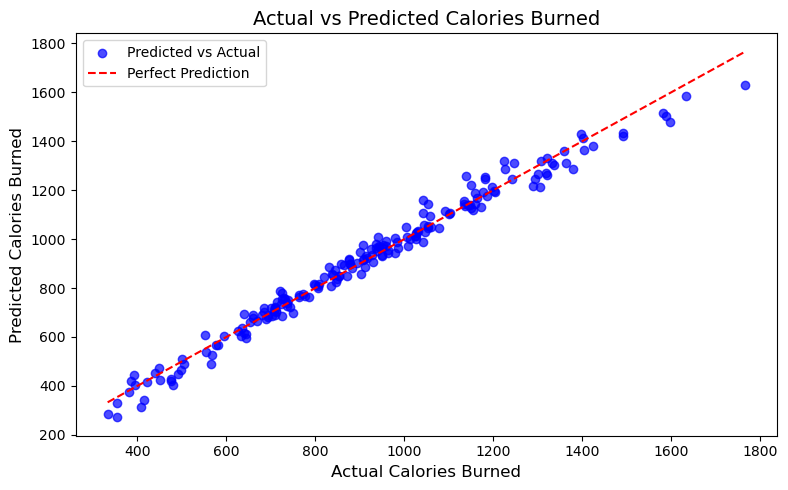

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs Actual')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')

plt.title('Actual vs Predicted Calories Burned', fontsize=14)
plt.xlabel('Actual Calories Burned', fontsize=12)
plt.ylabel('Predicted Calories Burned', fontsize=12)

plt.legend()
plt.savefig('results.pdf')
plt.tight_layout()
plt.show()


In conclusion, it is crucial to rely on real-world data rather than synthesized datasets. While we initially aimed to analyze the relationships between workout types and demographic factors, we were unable to establish significant correlations in this regard. Additionally, the recovery needs did not show any notable associations in our analysis.

On a positive note, we successfully developed an HTML application capable of accurately calculating a person's calorie expenditure. This tool provides valuable insights for trainees, helping them understand how much they should consume to maintain a healthy balance based on their fitness goals. This application serves as a practical resource for individuals looking to optimize their nutrition and training routines for better health outcomes.